In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
rgb_image = tf.random.uniform([100, 100, 3], maxval=255, dtype=tf.float32)
print(rgb_image)

tf.Tensor(
[[[187.52353   174.5212    177.52225  ]
  [ 73.91059   235.05328   224.11815  ]
  [233.8013    167.07803    45.418022 ]
  ...
  [ 37.238914   78.99636   107.0014   ]
  [213.40619   179.41905   223.72633  ]
  [  8.751295   47.177963  146.29646  ]]

 [[110.399765  192.00388   187.30943  ]
  [ 65.44194   101.0247    216.87901  ]
  [209.48373    71.32412    38.944355 ]
  ...
  [ 52.148857    1.2387335 172.2239   ]
  [214.45244    55.802406   57.926495 ]
  [239.01076   125.32737   102.79169  ]]

 [[193.55432    35.167812  116.67754  ]
  [152.40636    59.433098   55.872143 ]
  [176.05197   189.83852    43.53539  ]
  ...
  [215.00739    12.929886  215.67932  ]
  [ 14.158526   10.190475  171.64612  ]
  [174.91556   235.01811    47.844418 ]]

 ...

 [[236.66078    34.785553  131.09319  ]
  [185.88289   122.948425   51.475292 ]
  [142.7532     21.131245  167.58325  ]
  ...
  [ 36.50099    36.52887   175.95953  ]
  [105.14425   140.61623   179.24207  ]
  [ 43.01333   233.20747   100.24

tf.Tensor(
[[[178.73227 ]
  [185.61763 ]
  [173.13568 ]
  ...
  [ 69.69974 ]
  [194.6109  ]
  [ 46.987022]]

 [[167.05804 ]
  [103.586296]
  [108.92161 ]
  ...
  [ 35.947956]
  [103.45947 ]
  [156.72572 ]]

 [[ 91.798134]
  [ 86.81091 ]
  [169.02017 ]
  ...
  [ 96.44299 ]
  [ 29.78145 ]
  [195.69217 ]]

 ...

 [[106.101654]
  [133.5993  ]
  [ 74.17747 ]
  ...
  [ 52.41198 ]
  [134.40294 ]
  [161.17744 ]]

 [[183.00768 ]
  [ 76.35254 ]
  [160.06935 ]
  ...
  [169.68835 ]
  [ 65.55465 ]
  [ 92.560234]]

 [[112.86956 ]
  [161.84337 ]
  [100.361694]
  ...
  [ 97.489006]
  [ 61.326855]
  [156.37173 ]]], shape=(100, 100, 1), dtype=float32)


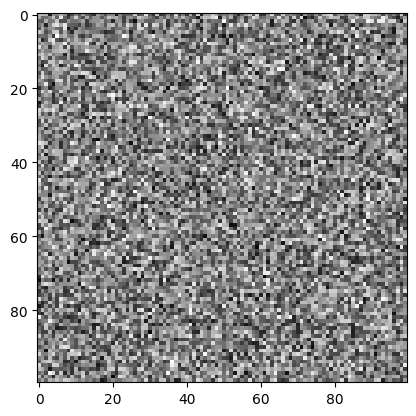

In [6]:
import matplotlib.pyplot as plt

grayscale_img = tf.image.rgb_to_grayscale(rgb_image)
print(grayscale_img)
plt.imshow(grayscale_img.numpy().squeeze(), cmap='gray')
plt.show()

In [7]:
R = rgb_image[:, :, 0] * 0.299
G = rgb_image[:, :, 1] * 0.587
B = rgb_image[:, :, 2] * 0.114
Y = R+G+B
print(grayscale_img[0][0], Y)


tf.Tensor([178.73227], shape=(1,), dtype=float32) tf.Tensor(
[[178.75102  185.62503  173.15904  ...  69.70346  194.63225   46.9879  ]
 [167.06908  103.59284  108.94256  ...  35.95317  103.48091  156.74963 ]
 [ 91.81749   86.82615  169.03778  ...  96.46449   29.782866 195.70964 ]
 ...
 [106.12532  133.61789   74.19174  ...  52.41563  134.41345  161.18175 ]
 [183.02667   76.36346  160.08342  ... 169.70409   65.55687   92.58487 ]
 [112.871    161.85565  100.38188  ...  97.50986   61.336334 156.38684 ]], shape=(100, 100), dtype=float32)


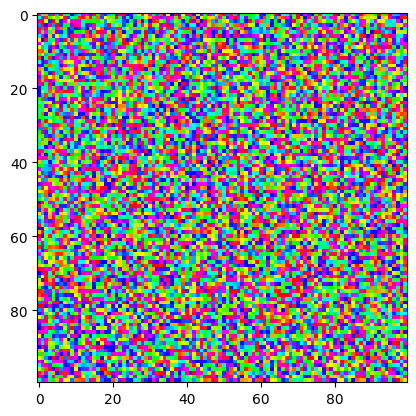

In [9]:
hsv_image = tf.image.rgb_to_hsv(rgb_image)
hue_channel = hsv_image[:, :, 0]
plt.imshow(hue_channel, cmap='hsv')

In [10]:
normalized_image = rgb_image / 255.0
rgb_image[0][0], normalized_image[0][0]

(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([187.52353, 174.5212 , 177.52225], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.7353864 , 0.68439686, 0.6961657 ], dtype=float32)>)

In [11]:
!wget https://raw.githubusercontent.com/Cobslab/imageBible/main/image/like_lenna224.png -O like_lenna.png

--2024-07-29 07:31:58--  https://raw.githubusercontent.com/Cobslab/imageBible/main/image/like_lenna224.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30283 (30K) [image/png]
Saving to: ‘like_lenna.png’

like_lenna.png      100%[===================>]  29.57K  --.-KB/s    in 0.002s  

2024-07-29 07:31:59 (17.6 MB/s) - ‘like_lenna.png’ saved [30283/30283]



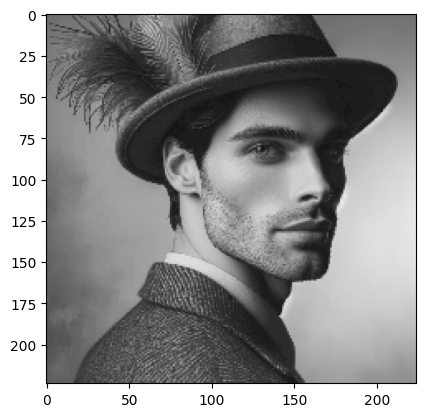

In [12]:
# Affine transform
import cv2

image_path = "like_lenna.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

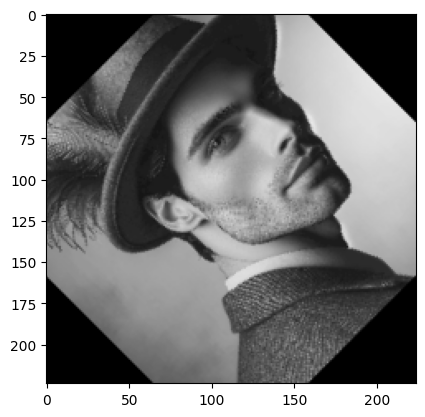

In [15]:
def rotate_image(image, angle, center=None):
  rows, cols, _ = image.shape
  if center is None:
    center = (cols // 2, rows // 2)
  rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
  rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
  return rotated_image

rotated_image = rotate_image(image, 45)
plt.imshow(rotated_image)

In [16]:
import numpy as np

!wget https://raw.githubusercontent.com/Lilcob/test_colab/main/perspective_test.jpg

img_path = 'perspective_test.jpg'
new_source_image = cv2.imread(img_path)

--2024-07-29 07:36:31--  https://raw.githubusercontent.com/Lilcob/test_colab/main/perspective_test.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 545890 (533K) [image/jpeg]
Saving to: ‘perspective_test.jpg’

perspective_test.jp 100%[===================>] 533.10K  --.-KB/s    in 0.03s   

2024-07-29 07:36:31 (16.3 MB/s) - ‘perspective_test.jpg’ saved [545890/545890]



In [18]:
ordered_corners = np.array([[57, 630], [936, 330], [1404, 792], [550, 1431]], dtype='float32')

ordered_width = int(max(np.linalg.norm(ordered_corners[0] - ordered_corners[1]), np.linalg.norm(ordered_corners[2] - ordered_corners[3])))
ordered_height = int(max(np.linalg.norm(ordered_corners[0] - ordered_corners[3]), np.linalg.norm(ordered_corners[1] - ordered_corners[2])))

ordered_rect_corners = np.array([[0, 0], [ordered_width, 0], [ordered_width, ordered_height], [0, ordered_height]], dtype='float32')

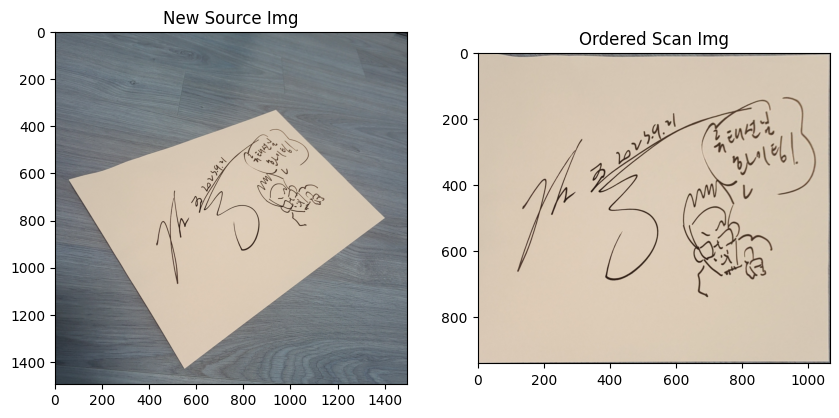

In [20]:
ordered_scan_matrix = cv2.getPerspectiveTransform(ordered_corners, ordered_rect_corners)
ordered_scan_image = cv2.warpPerspective(new_source_image, ordered_scan_matrix, (ordered_width, ordered_height))

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title("New Source Img")
plt.imshow(new_source_image)
plt.subplot(1, 2, 2)
plt.title("Ordered Scan Img")
plt.imshow(ordered_scan_image)
plt.show()

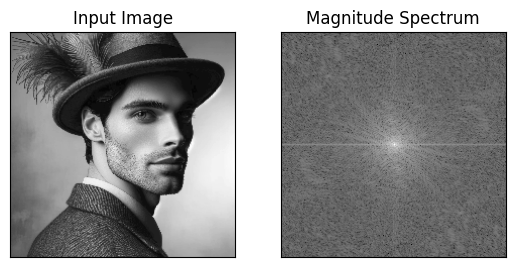

In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('like_lenna.png', cv2.IMREAD_GRAYSCALE)
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)
magnitude_spectrum_original = 20 * np.log(np.abs(fshift))

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum_original, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [23]:
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
radius = 30
mask = np.ones((rows, cols), np.uint8)
mask[crow - radius:crow + radius, ccol - radius:ccol + radius] = 0
fshift_filtered = fshift * mask

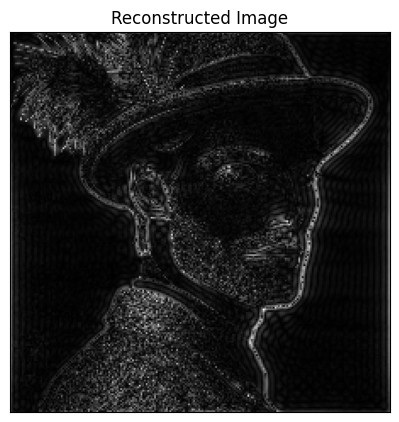

In [30]:
f_ishift = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=(12, 12))

plt.subplot(133), plt.imshow(img_back, cmap='gray') # Changed plt.show() to plt.imshow() to correctly display the image with the specified colormap
plt.title('Reconstructed Image'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

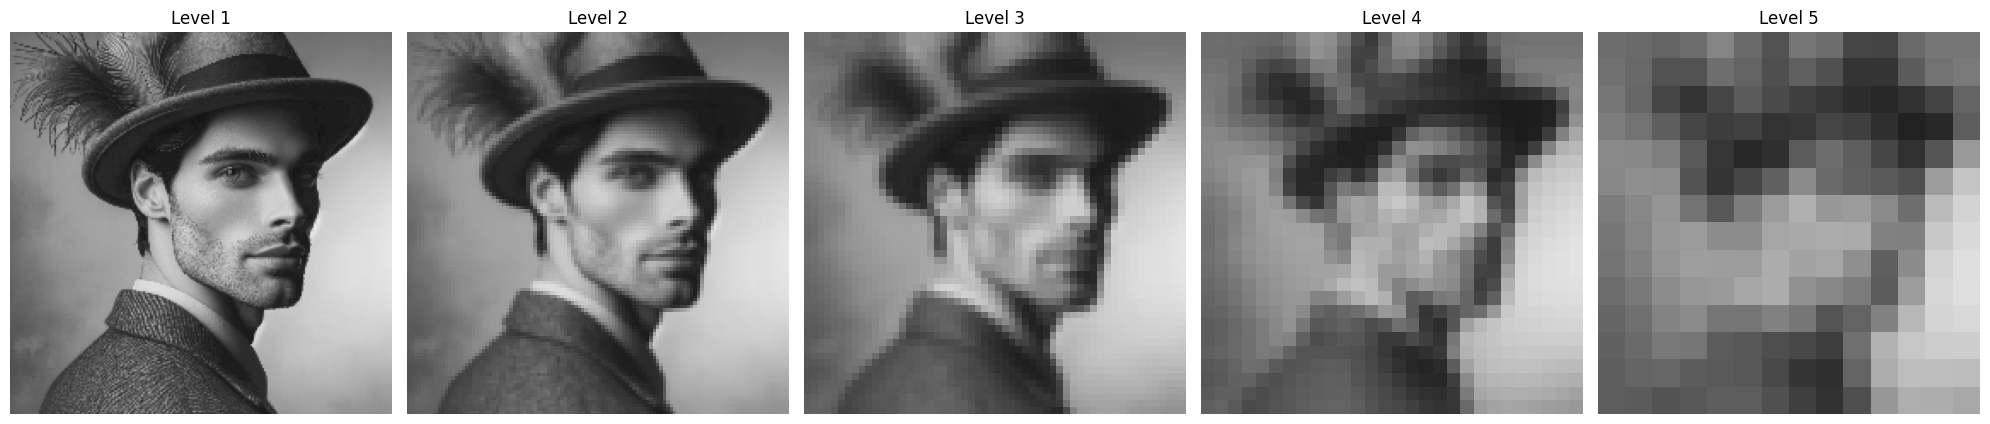

In [28]:
import cv2
import matplotlib.pyplot as plt

# 이미지 로드
image = cv2.imread("like_lenna.png", cv2.IMREAD_COLOR)
# OpenCV는 BGR 형식으로 이미지를 로드하므로 RGB로 변환
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def gaussian_pyramid(image, levels):
    pyramid = [image]
    for i in range(levels-1):
        image = cv2.pyrDown(image)
        pyramid.append(image)
    return pyramid

levels = 5
pyramid = gaussian_pyramid(image_rgb, levels)

# 가우시안 피라미드를 시각화
fig, axes = plt.subplots(1, levels, figsize=(20, 8))
for i, ax in enumerate(axes):
    ax.imshow(pyramid[i])
    ax.axis('off')
    ax.set_title(f'Level {i+1}')

plt.tight_layout()
plt.show()

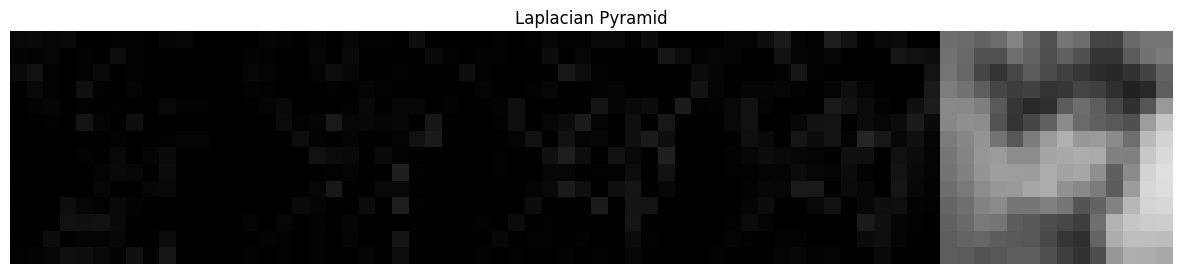

In [29]:
# 1. 이미지 로드
image = cv2.imread("like_lenna.png", cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 2. 가우시안 피라미드 생성 함수
def gaussian_pyramid(image, levels):
    """이미지의 가우시안 피라미드를 생성하는 함수"""
    pyramid = [image]
    for i in range(levels-1):
        image = cv2.pyrDown(image)
        pyramid.append(image)
    return pyramid

# 3. 라플라시안 피라미드 생성 함수
def laplacian_pyramid(gaussian_pyramid):
    laplacian = []
    for i in range(len(gaussian_pyramid) - 1):
        next_level = cv2.pyrUp(gaussian_pyramid[i+1])
        if next_level.shape[0] > gaussian_pyramid[i].shape[0]:
            next_level = next_level[:-1, :, :]
        if next_level.shape[1] > gaussian_pyramid[i].shape[1]:
            next_level = next_level[:, :-1, :]
        lap = cv2.subtract(gaussian_pyramid[i], next_level)
        laplacian.append(lap)
    laplacian.append(gaussian_pyramid[-1])
    return laplacian

levels = 5
g_pyramid = gaussian_pyramid(image_rgb, levels)
l_pyramid = laplacian_pyramid(g_pyramid)

# 4. 라플라시안 피라미드를 가로로 연결
min_height = min([img.shape[0] for img in l_pyramid])
concatenated_laplace_horizontal = cv2.resize(l_pyramid[0], (int(l_pyramid[0].shape[1] * min_height / l_pyramid[0].shape[0]), min_height))

fig, ax = plt.subplots(figsize=(15, 6))

for idx, img in enumerate(l_pyramid[1:], start=1):
    resized_img = cv2.resize(img, (int(img.shape[1] * min_height / img.shape[0]), min_height))
    concatenated_laplace_horizontal = cv2.hconcat([concatenated_laplace_horizontal, resized_img])

ax.imshow(concatenated_laplace_horizontal, cmap='gray')
ax.axis('off')

plt.title('Laplacian Pyramid')
plt.show()

Text(0.5, 1.0, 'Canny Edge Detection')

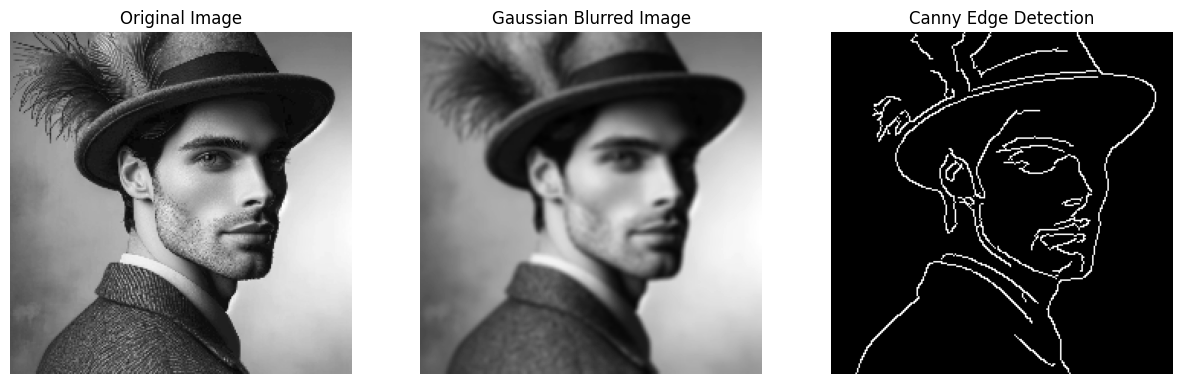

In [31]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("like_lenna.png", cv2.IMREAD_GRAYSCALE)

blurred_image = cv2.GaussianBlur(image, (5, 5), 1.4)

canny_edges = cv2.Canny(blurred_image, threshold1=50, threshold2=150)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original Image')
axes[1].imshow(blurred_image, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Gaussian Blurred Image')
axes[2].imshow(canny_edges, cmap='gray')
axes[2].axis('off')
axes[2].set_title('Canny Edge Detection')